In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [56]:
np.random.seed(0)

In [57]:
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [58]:
# Combination the data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), (np.ones(len(cats_data)))))

In [59]:
# Split data into training and testing
# 0.2 means 20% reserved for testing and 80% for training
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

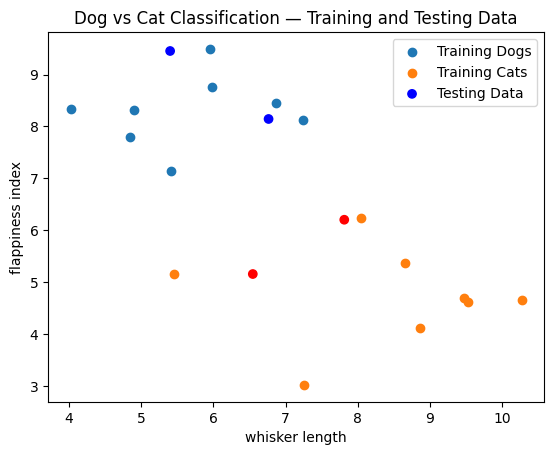

In [60]:
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], label="Training Dogs")
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label="Training Cats")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap="bwr", label="Testing Data")
plt.xlabel("whisker length")
plt.ylabel("flappiness index")
plt.title("Dog vs Cat Classification — Training and Testing Data")
plt.legend()
plt.show()

In [61]:
# Implementing Python code to run the alogorithum
# d == 2 , number of features ( whisker length, flappiness index)

def random_linear_classifier(data_dogs, data_cats, k , d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d) # 01x1 +02x2
        theta0 = np.random.normal() #theta0

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0


# Compute Error Function
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog)+theta0 <= 0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta, x_cat)+theta0 > 0:
            error+=1
    return error

# Cross Validation Function for K-Fold 

In [62]:
# n_splits = 5 means divided into 5 kfold parts
def cross_validate(data_dogs, data_cats, k_values, d , n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold = random_linear_classifier(X_train_fold[y_train_fold == 0], X_train_fold[y_train_fold == 1],k,d)
            
            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1], best_theta_fold, best_theta0_fold))
        
        avg_errors.append(np.mean(errors))
    
    # argmin mean take the LOWEST/Minimum Values 
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Define k values to try
k_values = [ 1, 10, 50, 100, 200, 350]

best_k = cross_validate(dogs_data, cats_data, k_values, d=2)

print(f"Best value of k: {best_k}")



Best value of k: 100


In [63]:
# Run Random Linear Classifier Algorithm on Training data
dogs_tr = X_train[Y_train == 1]
cats_tr = X_train[Y_train == 0]

k = 100 # Number of iterations
d = 2 # Number of features

best_theta_train, best_theta0_train = random_linear_classifier(dogs_tr, cats_tr, k, d)
train_error = compute_error(dogs_tr, cats_tr, best_theta_train, best_theta0_train)

In [64]:
train_error

0

In [65]:
#Plot the decision boundary
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])

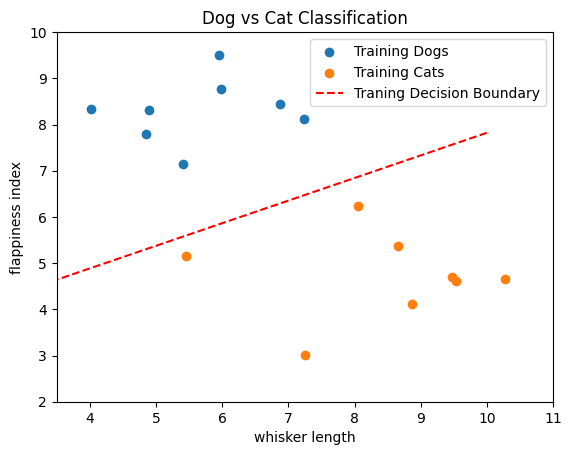

In [66]:
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], label="Training Dogs") 
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label="Training Cats") 
plt.plot(x_vals_train, y_vals_train, color="red", linestyle="--", label="Traning Decision Boundary") 
#Set same limits for x and y axes 
plt.xlim([3.5, 11]) 
plt.ylim([2, 10]) 
plt.xlabel("whisker length") 
plt.ylabel("flappiness index") 
plt.title("Dog vs Cat Classification") 
plt.legend() 
plt.show()

In [67]:
print(f"Training Error : {train_error}")

Training Error : 0


In [68]:
# Compute testing error
test_error = compute_error(X_test[Y_test == 0], X_test[Y_test == 1], best_theta_train, best_theta0_train)
print(f"Testing Error : {test_error}")

Testing Error : 4


In [70]:
# Decision boundary over the TEST range
x_vals_test = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_vals_test = (-best_theta_train[0] / best_theta_train[1]) * x_vals_test - (best_theta0_train / best_theta_train[1])

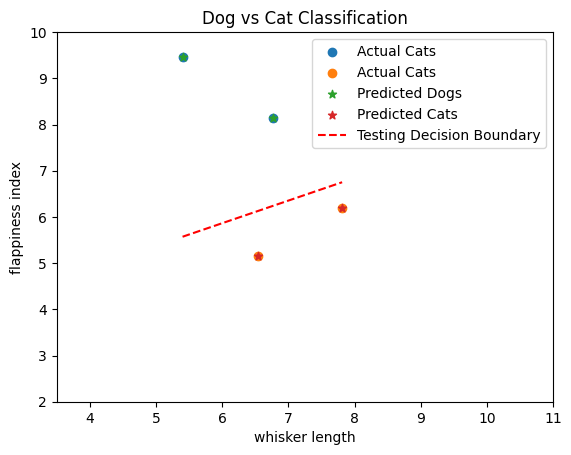

In [71]:
plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], label="Actual Cats")
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label="Actual Cats")


predicted_labels = np.zeros_like(Y_test)
for i, x_test in enumerate(X_test):  # avoid shadowing X_test
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1

# Plot predicted test data points
plt.scatter(X_test[predicted_labels == 0][:, 0], X_test[predicted_labels == 0][:, 1], marker="*", label="Predicted Dogs")
plt.scatter(X_test[predicted_labels == 1][:, 0], X_test[predicted_labels == 1][:, 1], marker="*", label="Predicted Cats")
plt.plot(x_vals_test, y_vals_test, color="red", linestyle="--", label="Testing Decision Boundary")

# Set same limits for x and y axes 
plt.xlim([3.5, 11]) 
plt.ylim([2, 10]) 
plt.xlabel("whisker length") 
plt.ylabel("flappiness index") 
plt.title("Dog vs Cat Classification") 
plt.legend() 
plt.show()